In [1]:
pip install qutip

Note: you may need to restart the kernel to use updated packages.


In [7]:
# Import all required packages

from qutip import *
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image #To show Image

In [8]:
# Calculating the tensor product between matrices

# 1. Initialize the matrices

X = sigmax()
Z = sigmaz()

ZX = tensor(Z, X)

ZX

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 0.  1.  0.  0.]
 [ 1.  0.  0.  0.]
 [ 0.  0.  0. -1.]
 [ 0.  0. -1.  0.]]

In [4]:
N = 2
# the unit method is useful to normalize states
superposition = (fock(N,0)+fock(N,1)).unit()
entangled_state = bell_state('01')

# superposition
entangled_state

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.70710678]
 [ 0.        ]
 [ 0.        ]
 [-0.70710678]]

In [5]:
?bell_state

In [17]:
#Define my input states
N=2
psi_1 = fock(N,0)
psi_2 = fock(N,0)

init = tensor(psi_1,psi_2)

init

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[1.]
 [0.]
 [0.]
 [0.]]

In [55]:
#Define the PBS operator
pbs = (1/(2**0.5))*Qobj([[1,1j],[1j,1]])

pbs_f = tensor(pbs,pbs)

pbs_f

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[ 0.5+0.j   0. +0.5j  0. +0.5j -0.5+0.j ]
 [ 0. +0.5j  0.5+0.j  -0.5+0.j   0. +0.5j]
 [ 0. +0.5j -0.5+0.j   0.5+0.j   0. +0.5j]
 [-0.5+0.j   0. +0.5j  0. +0.5j  0.5+0.j ]]

In [56]:
pbs_f*init

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.5+0.j ]
 [ 0. +0.5j]
 [ 0. +0.5j]
 [-0.5+0.j ]]

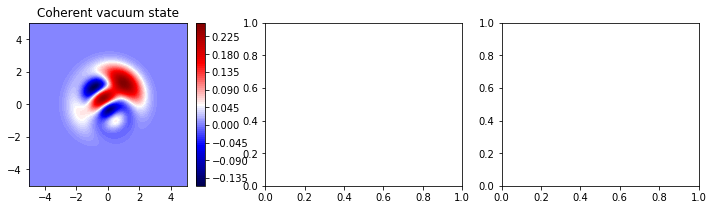

In [60]:
# Plot the Wigner function for a fock vacuum state

# Initialize the states
N = 25 # Levels in the Hilbert space

coherent_vac = pbs_f*init
n_3 = fock(N,3)
coherent_n_3 = coherent(N,np.sqrt(3))

# Initalize plot variables
xvec = np.linspace(-5,5,200)
yvec = xvec

# Calculate the wigner function for the states
W_coherent_vac = wigner(coherent_vac, xvec, yvec)
W_n_3 = wigner(n_3, xvec, yvec)
W_coherent_n_3 = wigner(coherent_n_3, xvec, yvec)

# create a plot for 3 figures
fig, axes = plt.subplots(1, 3, figsize=(12,3))

# create contour plots using the results of the wigner func
# The colour distribution varies from that in the lecture notes as it is not normalized to -1 to 1
cont0 = axes[0].contourf(xvec, xvec, W_coherent_vac, 100, cmap = 'seismic')
# cont1 = axes[1].contourf(xvec, xvec, W_n_3, 100, cmap = 'seismic')
# cont2 = axes[2].contourf(xvec, xvec, W_coherent_n_3, 100, cmap = 'seismic')

# add colorbar
cb0 = fig.colorbar(cont0,ax = axes[0])
# cb1 = fig.colorbar(cont1,ax = axes[1])
# cb2 = fig.colorbar(cont2,ax = axes[2])

# set the title for each plot
lbl0 = axes[0].set_title("Coherent vacuum state")
# lbl1 = axes[1].set_title("3 Photon Fock State")
# lbl2 = axes[2].set_title("n average = 3 Coherent State")